# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [266]:
#Write your code here, You may need to use python open() function to open the file and load data.
import pandas as pd
import json
import matplotlib.pyplot as plt

function = open('/content/yearinfo.json')
yearinfo = json.load(function)
print(yearinfo)


{'2010': [{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am']}, 

In [267]:
#Printing the keys inside the json file
yearinfo.keys()

dict_keys(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])

In [268]:
#Checking the number of songs per year
len(yearinfo['2013'])

100

In [269]:
#Print column names 
yearinfo['2013'][0].keys()

dict_keys(['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url'])

In [270]:
#Checking value format stored 
yearinfo['2013'][0].values()

dict_values([['Macklemore & Ryan Lewis', 'Wanz'], ['/wiki/Thrift_Shop'], ['Thrift Shop'], 1, '"Thrift Shop"', ['/wiki/Macklemore_%26_Ryan_Lewis', '/wiki/Wanz']])

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

![image-3.png](attachment:image-3.png)

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [271]:
#write your code here
# Prepare a column names so that we can use it for the DataFrame, which is all the keys and also add the year in the list
column = list(yearinfo['2013'][0].keys())+(['year'])
column

['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url', 'year']

In [272]:
# Store the values in the a new list along with the year
song_list = []
for key, value in yearinfo.items():
    for i in value:
        data = list(i.values())+[key]
        song_list.append(data)
print(song_list)

[[['Kesha'], ['/wiki/Tik_Tok_(song)'], ['Tik Tok (song)'], 1, '"Tik Tok"', ['/wiki/Kesha'], '2010'], [['Lady Antebellum'], ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], ['Need You Now (Lady Antebellum song)'], 2, '"Need You Now"', ['/wiki/Lady_Antebellum'], '2010'], [['Train (band)'], ['/wiki/Hey,_Soul_Sister'], ['Hey, Soul Sister'], 3, '"Hey, Soul Sister"', ['/wiki/Train_(band)'], '2010'], [['Katy Perry', 'Snoop Dogg'], ['/wiki/California_Gurls'], ['California Gurls'], 4, '"California Gurls"', ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg'], '2010'], [['Usher (musician)', 'Will.i.am'], ['/wiki/OMG_(Usher_song)'], ['OMG (Usher song)'], 5, '"OMG"', ['/wiki/Usher_(musician)', '/wiki/Will.i.am'], '2010'], [['B.o.B', 'Hayley Williams'], ['/wiki/Airplanes_(song)'], ['Airplanes (song)'], 6, '"Airplanes"', ['/wiki/B.o.B', '/wiki/Hayley_Williams'], '2010'], [['Eminem', 'Rihanna'], ['/wiki/Love_the_Way_You_Lie'], ['Love the Way You Lie'], 7, '"Love the Way You Lie"', ['/wiki/Eminem', '/wiki/Rihanna']

In [273]:
#Create a dataframe
df = pd.DataFrame(song_list,columns=column)

In [274]:
#printing the last 5 data by default with the paremeter 
df.tail()

band_singer  \
1195                     [Lainey Wilson]   
1196                          [BRS Kash]   
1197                          [Rod Wave]   
1198  [Chase Rice, Florida Georgia Line]   
1199                    [Rauw Alejandro]   

                                               song  \
1195               [/wiki/Things_a_Man_Oughta_Know]   
1196                  [/wiki/Throat_Baby_(Go_Baby)]   
1197                       [/wiki/Tombstone_(song)]   
1198  [/wiki/Drinkin%27_Beer._Talkin%27_God._Amen.]   
1199                             [/wiki/Todo_de_Ti]   

                                  songurl  ranking  \
1195           [Things a Man Oughta Know]       96   
1196              [Throat Baby (Go Baby)]       97   
1197                   [Tombstone (song)]       98   
1198  [Drinkin' Beer. Talkin' God. Amen.]       99   
1199                         [Todo de Ti]      100   

                                titletext  \
1195           "Things a Man Oughta Know"   
1196              "Throat Baby (Go Baby)"   
1197                          "Tombstone"   
1198  "Drinkin' Beer. Talkin' God. Amen."   
1199                         "Todo de Ti"   

                                                 url  year  
1195                           [/wiki/Lainey_Wilson]  2021  
1196                                [/wiki/BRS_Kash]  2021  
1197                                [/wiki/Rod_Wave]  2021  
1198  [/wiki/Chase_Rice, /wiki/Florida_Georgia_Line]  2021  
1199                          [/wiki/Rauw_Alejandro]  2021

In [275]:
#To fetch the first band_singer from our dataframe
df.band_singer[0][0]

'Kesha'

In [276]:
#Checking datatypes of song in our dataframe
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [277]:
# Change year datatype to int
df = df.astype({'year': 'int'})
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year            int64
dtype: object

In [278]:
#function to enter the datapoint in the formated value in the dataset
def List_Value(list_name):
    value = list_name[0]
    return value

#datapoints format that we want
df['band_singer'] = df.band_singer.map(List_Value)
df['song'] = df.song.map(List_Value)
df['songurl'] = df.songurl.map(List_Value)
df['url'] = df.url.map(List_Value)

In [279]:
#Printing the last five data
df.tail()

band_singer                                         song  \
1195   Lainey Wilson               /wiki/Things_a_Man_Oughta_Know   
1196        BRS Kash                  /wiki/Throat_Baby_(Go_Baby)   
1197        Rod Wave                       /wiki/Tombstone_(song)   
1198      Chase Rice  /wiki/Drinkin%27_Beer._Talkin%27_God._Amen.   
1199  Rauw Alejandro                             /wiki/Todo_de_Ti   

                                songurl  ranking  \
1195           Things a Man Oughta Know       96   
1196              Throat Baby (Go Baby)       97   
1197                   Tombstone (song)       98   
1198  Drinkin' Beer. Talkin' God. Amen.       99   
1199                         Todo de Ti      100   

                                titletext                   url  year  
1195           "Things a Man Oughta Know"   /wiki/Lainey_Wilson  2021  
1196              "Throat Baby (Go Baby)"        /wiki/BRS_Kash  2021  
1197                          "Tombstone"        /wiki/Rod_Wave  2021  
1198  "Drinkin' Beer. Talkin' God. Amen."      /wiki/Chase_Rice  2021  
1199                         "Todo de Ti"  /wiki/Rauw_Alejandro  2021

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [280]:
# Selecting for plotting a graph
newdf = df.value_counts(subset=['band_singer'], ascending=False)
newdf

band_singer      
Drake (musician)     26
Maroon 5             21
Rihanna              21
Ariana Grande        20
Taylor Swift         19
                     ..
Duncan Laurence       1
Dr. Dre               1
Donald Glover         1
Mike Will Made It     1
Kris Allen            1
Length: 436, dtype: int64

In [281]:
#Return singers who have appeared more than 15 times. 
#Limiting value_counts to be greater than 15.
newdf = newdf.loc[lambda x : x > 15]
newdf

band_singer     
Drake (musician)    26
Maroon 5            21
Rihanna             21
Ariana Grande       20
Taylor Swift        19
The Weeknd          16
dtype: int64

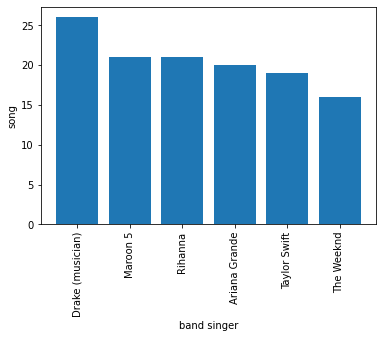

In [282]:
# Plot the most prolific singers which appeared more than 15 times. 
y = df.band_singer.value_counts().loc[lambda x : x > 15]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('band singer')
plt.ylabel('song')
plt.show()

**Question: Who is the most profilic singer?**


Answer: Drake(musician) is the most profilic singer because he appeared more than 26 times

### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [283]:
#write your code here
#Adding score column and datapoint
df['score'] = [101-i for i in df['ranking']]
df.head()


band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  score  
0             /wiki/Kesha  2010    100  
1   /wiki/Lady_Antebellum  2010     99  
2      /wiki/Train_(band)  2010     98  
3        /wiki/Katy_Perry  2010     97  
4  /wiki/Usher_(musician)  2010     96

In [284]:
#Checking datatype
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year            int64
score           int64
dtype: object

In [285]:
#Adding total score of the singer along with singer
#Name to the singer_score and converting it to the series

singer_score = {}

for singer, songs in df.groupby('band_singer'):
    singer_score[singer] = songs.score.sum()

singer_score

{'2 Chainz': 49,
 '21 Savage': 112,
 '24kGoldn': 151,
 '3OH!3': 28,
 '5 Seconds of Summer': 156,
 '6ix9ine': 115,
 'A Boogie wit da Hoodie': 99,
 'A Great Big World': 84,
 'AJR (band)': 45,
 'ASAP Ferg': 27,
 'ASAP Rocky': 60,
 'Ace Hood': 10,
 'Adam Lambert': 56,
 'Adele': 657,
 'Alessia Cara': 140,
 'Alex Clare': 71,
 'Alicia Keys': 77,
 'Aloe Blacc': 53,
 'American Authors': 70,
 'Aminé (rapper)': 41,
 'Andy Grammer': 76,
 'Anna Kendrick': 80,
 'Ariana Grande': 1104,
 'Arizona Zervas': 85,
 'Ava Max': 106,
 'Avicii': 202,
 'Avril Lavigne': 39,
 'Awolnation': 76,
 'Ayo & Teo': 40,
 'B.o.B': 244,
 'BRS Kash': 4,
 'BTS': 213,
 'Baauer': 97,
 'Bad Bunny': 148,
 'Bad Meets Evil': 67,
 'Bastille (band)': 89,
 'Bazzi (singer)': 86,
 'Bebe Rexha': 98,
 'Becky G': 32,
 'Benee': 17,
 'Benny Blanco': 108,
 'Beyoncé': 172,
 'Big Sean': 178,
 'Billie Eilish': 380,
 'Black Eyed Peas': 51,
 'Blackbear (musician)': 78,
 'Blake Shelton': 200,
 'Blanco Brown': 45,
 'BlocBoy JB': 78,
 'Blueface': 54,


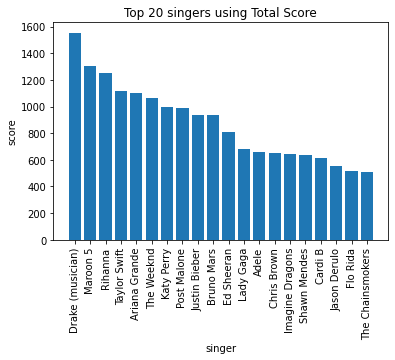

In [286]:
#ploting graph
y = pd.Series(data=singer_score, index=singer_score.keys()).sort_values(ascending=False)[:20]
x = y.index
plt.bar(x,y)
plt.title('Top 20 singers using Total Score')
plt.xticks(rotation=90)
plt.xlabel('singer')
plt.ylabel('score')
plt.show()

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

Answer: Yes, when we modify the measure, there is a difference. When it comes to the number of appearances, Taylor Swift is in fourth place, but Ariana Grande is in fourth place when it comes to the scores. This is because in the first situation, we simply evaluate the number of times the singers appear in the top 100, however in the second case, we consider the ranking as well as the number of times the singers appear in the top 100, and then we award a higher score to those who appear in the higher ranking.


## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

In [287]:
#Printing first five data
df.head()

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  score  
0             /wiki/Kesha  2010    100  
1   /wiki/Lady_Antebellum  2010     99  
2      /wiki/Train_(band)  2010     98  
3        /wiki/Katy_Perry  2010     97  
4  /wiki/Usher_(musician)  2010     96

In [288]:
#write your solution from here
#Printing the most highest ranked singer in each year
for key, value in df.groupby('year'):
    hrank_df = value[value.ranking == value.ranking.max()]
    print(hrank_df.year, hrank_df.band_singer)

99    2010
Name: year, dtype: int64 99    Jerrod Niemann
Name: band_singer, dtype: object
199    2011
Name: year, dtype: int64 199    Big Sean
Name: band_singer, dtype: object
299    2012
Name: year, dtype: int64 299    Linkin Park
Name: band_singer, dtype: object
399    2013
Name: year, dtype: int64 399    Paramore
Name: band_singer, dtype: object
499    2014
Name: year, dtype: int64 499    Miley Cyrus
Name: band_singer, dtype: object
599    2015
Name: year, dtype: int64 599    Calvin Harris
Name: band_singer, dtype: object
699    2016
Name: year, dtype: int64 699    One Direction
Name: band_singer, dtype: object
799    2017
Name: year, dtype: int64 799    Keith Urban
Name: band_singer, dtype: object
899    2018
Name: year, dtype: int64 899    Imagine Dragons
Name: band_singer, dtype: object
999    2019
Name: year, dtype: int64 999    Juice Wrld
Name: band_singer, dtype: object
1099    2020
Name: year, dtype: int64 1099    NLE Choppa
Name: band_singer, dtype: object
1199    2021
Name:

In [289]:
#Print each band_singer's max score on a single song

score_max = {}
for singer, songs in df.groupby('band_singer'):
    score_max[singer] = songs.score.max()

score_max


{'2 Chainz': 47,
 '21 Savage': 59,
 '24kGoldn': 97,
 '3OH!3': 28,
 '5 Seconds of Summer': 68,
 '6ix9ine': 70,
 'A Boogie wit da Hoodie': 60,
 'A Great Big World': 84,
 'AJR (band)': 45,
 'ASAP Ferg': 27,
 'ASAP Rocky': 60,
 'Ace Hood': 10,
 'Adam Lambert': 56,
 'Adele': 100,
 'Alessia Cara': 71,
 'Alex Clare': 71,
 'Alicia Keys': 52,
 'Aloe Blacc': 53,
 'American Authors': 70,
 'Aminé (rapper)': 41,
 'Andy Grammer': 76,
 'Anna Kendrick': 80,
 'Ariana Grande': 94,
 'Arizona Zervas': 85,
 'Ava Max': 78,
 'Avicii': 82,
 'Avril Lavigne': 39,
 'Awolnation': 76,
 'Ayo & Teo': 40,
 'B.o.B': 95,
 'BRS Kash': 4,
 'BTS': 90,
 'Baauer': 97,
 'Bad Bunny': 73,
 'Bad Meets Evil': 67,
 'Bastille (band)': 89,
 'Bazzi (singer)': 80,
 'Bebe Rexha': 98,
 'Becky G': 32,
 'Benee': 17,
 'Benny Blanco': 84,
 'Beyoncé': 66,
 'Big Sean': 66,
 'Billie Eilish': 97,
 'Black Eyed Peas': 51,
 'Blackbear (musician)': 75,
 'Blake Shelton': 49,
 'Blanco Brown': 45,
 'BlocBoy JB': 78,
 'Blueface': 54,
 'Bobby Shmurda':

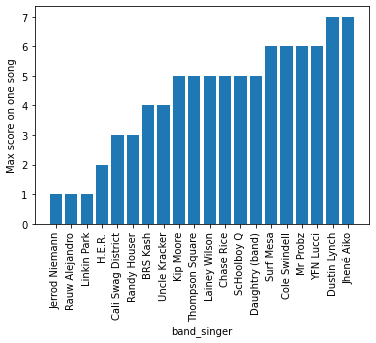

In [290]:
# Order the singers by their max score on single song in an ascending order using a bar chart. 
y = pd.Series(data=score_max, index=score_max.keys()).sort_values(ascending=True)[:20]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('band_singer')
plt.ylabel('Max score on one song')
plt.show()

The above bar graph shows that the maximum score of Jerrod Niemann, Rauw Alejandro and Linkin Park are least with score equal to 1.

## SUBMISSION DATE: 2nd April 2022 